# Statistička analiza SoSci Data iz CSV v4.1

In [57]:
work_version_num = 4.2
word_version_suffix = ""
work_version = f"v{work_version_num}{word_version_suffix}"

print(work_version)

v4.2


# [1] Definirati stimuluse i nazivlje

In [58]:
# Define the stimuli
stimuli = ['apa',
           'ata',
           'aka',
           'aba',
           'ada',
           'aga',
           'asa',
           'aša',
           'aza',
           'aža',
           'afa',
           'aha',
           'aca',
           'ača',
           'ađa',
           'aja',
           'ana',
           'ama',
           'ara',
           'ala',
           'ava']

In [59]:
# Define the stimuli
stimuli_sosci =   ['apa',
                   'ata',
                   'aka',
                   'aba',
                   'ada',
                   'aga',
                   'asa',
                   'aša',
                   'aza',
                   'aža',
                   'aha',
                   'afa',
                   'aca',
                   'ača',
                   'ađa',
                   'ama',
                   'ana',
                   'aja',
                   'ara',
                   'ala',
                   'ava']

In [60]:
# Extract unique phonemes by removing 'a's
phonemes = [stimulus.replace('a', '') for stimulus in stimuli]
phonemes_sosci = [stimulus.replace('a', '') for stimulus in stimuli_sosci]

# Create a mapping from numbers to phonemes
phoneme_mapping = {i+1: phoneme for i, phoneme in enumerate(phonemes)}
phoneme_mapping_sosci = {i+1: phoneme for i, phoneme in enumerate(phonemes_sosci)}

# Output the phoneme mapping
print(f"phoneme_mapping\n{phoneme_mapping}\nphoneme_mapping_sosci\n{phoneme_mapping_sosci}")


phoneme_mapping
{1: 'p', 2: 't', 3: 'k', 4: 'b', 5: 'd', 6: 'g', 7: 's', 8: 'š', 9: 'z', 10: 'ž', 11: 'f', 12: 'h', 13: 'c', 14: 'č', 15: 'đ', 16: 'j', 17: 'n', 18: 'm', 19: 'r', 20: 'l', 21: 'v'}
phoneme_mapping_sosci
{1: 'p', 2: 't', 3: 'k', 4: 'b', 5: 'd', 6: 'g', 7: 's', 8: 'š', 9: 'z', 10: 'ž', 11: 'h', 12: 'f', 13: 'c', 14: 'č', 15: 'đ', 16: 'm', 17: 'n', 18: 'j', 19: 'r', 20: 'l', 21: 'v'}


## [2] Open CSV, extract, map

In [61]:
#data_path = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Data\data_porupski_2024-06-10_02-07.csv"
data_path_base = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Data"

#data_version_name = r"\data_porupski_2024-06-10_02-07.csv" # until 12 lip 2024
#data_version_name = r"\data_porupski_2024-06-12_01-15.csv" # until 20 lip 2024
#data_version_name = r"\data_porupski_2024-06-20_23-45.csv" # until 22 lip 2024
#data_version_name = r"\data_porupski_2024-06-22_15-22.csv" # until 24 lip 2024
data_version_name = r"\data_porupski_2024-06-24_03-25.csv"

data_path_csv = data_path_base + data_version_name

In [62]:
import pandas as pd

# # Set display options to show all rows and columns
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 52)


try:
    df = pd.read_csv(data_path_csv, encoding='utf-16', delimiter='\t')
    print("Successfully read the file with UTF-16 LE encoding and tab delimiter.\n")
except Exception as e:
    print(f"Failed to read the file: {e}")
    df = None

if df is not None:
    # Extract the columns of interest (S101-S184, S201-S284, and S301-S384)
    columns_of_interest = []

    for i in range(101, 185):
        columns_of_interest.append(f'S{i}')
    for i in range(201, 285):
        columns_of_interest.append(f'S{i}')
    for i in range(301, 385):
        columns_of_interest.append(f'S{i}')

    # Add the additional columns at the end
    additional_columns = ['dob', 'sluh', 'hrv']
    columns_of_interest.extend(additional_columns)

    # Extract only the columns of interest from the dataframe
    # Also make sure the necessary columns (DP02_01, DP05, DP06) are present
    required_columns = columns_of_interest[:-3] + ['DP02_01', 'DP05', 'DP06']
    
    if all(col in df.columns for col in required_columns):
        df_extracted = df[required_columns].copy()  # Create a copy of the DataFrame slice

        # Rename the DP columns to the additional columns
        df_extracted.rename(columns={'DP02_01': 'dob', 'DP05': 'sluh', 'DP06': 'hrv'}, inplace=True)

        # Reorder columns to have additional columns at the end
        final_columns = columns_of_interest
        df_final = df_extracted[final_columns]
        
        print("Extracted and renamed columns successfully.")
        df_final.at[0, 'dob'] = "1"
        df_final.at[0, 'sluh'] = "1"
        df_final.at[0, 'hrv'] = "1"
        print(df_final.head())
    else:
        print("Required columns are missing from the data.")
else:
    print("Dataframe is None.")


# Iterate over columns and rows, convert values to integers except for the first row
for col in df_final.columns:
    for i, val in enumerate(df_final[col]):
        if i != 0:  # Skip the first row
            try:
                df_final.at[i, col] = int(val)
            except ValueError:
                pass  # If conversion to int fails, leave the value as it is

df_final.at[0, 'dob'] = 0
df_final.at[0, 'sluh'] = 1
df_final.at[0, 'hrv'] = 1
        
print(f"\nData ROW 0 at S384 is now of {type(df_final.at[0, 'S384'])} type")
print(f"Data ROW 0 at sluh is now of {type(df_final.at[1, 'sluh'])} type")
print(f"Data ROWS 1-{len(df_final)} at sluh is now of {type(df_final.at[1, 'sluh'])} type")

print(f"Crude Sample size: {len(df_final)}\n") 
print(df_final.tail())



Successfully read the file with UTF-16 LE encoding and tab delimiter.

Extracted and renamed columns successfully.
  S101 S102 S103 S104 S105 S106 S107 S108 S109 S110 S111 S112 S113 S114 S115  \
0    p    t    k    b    d    g    s    š    z    ž    f    h    c    č    đ   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2    1    1    3    4   17   18   17    8    2    9   11    1   13   14    5   
3   20   11   19   20    2   16    7   17   19   19    1   20   13   18   11   
4   16   20   16    2    2   16   16   16   17   16    2   16   18   15   15   

  S116 S117 S118 S119 S120 S121 S122 S123 S124 S125 S126  ... S362 S363 S364  \
0    j    n    m    r    l    v    p    t    k    b    d  ...    l    v    p   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2   18   17   17   19   21   16    3   17    3    1   17  ...   21   21    1   
3   18   17   17    1   11   20   17    2    3    1   19  ...   11    2    1   
4   

## [ ] Fix mismatch /j, m/ i /f, h/

In [63]:
# Fix SoSci mismatch?
fix_mismatch = True

In [64]:
import pandas as pd

# Define the phoneme pairs to swap
swap_fon = [["j", "m"], ["f", "h"]]

# Define the shift values
shift = [0, 21, 42, 63]

# Create reversed dictionaries for mapping letters to integers
reversed_mapping = {v: k for k, v in phoneme_mapping.items()}
reversed_mapping_sosci = {v: k for k, v in phoneme_mapping_sosci.items()}

map_to_sosci = True

if not map_to_sosci:
    reverse_map = reversed_mapping
    print("Mapping to SPEECH MATERIAL\n")
else:
    reverse_map = reversed_mapping_sosci
    print("Mapping to SOSCI INPUTS\n")

    ### IMPORTANT FOR LATER
    #map_to_sosci = False


swap_snr = ['S1', 'S2', 'S3']

# Function to get mapped integer from a letter
def get_mapped_integer(letter):
    return reverse_map.get(letter, None)

if fix_mismatch:
    # Iterate over each pair in swap_fon
    for pair in swap_fon:
        phoneme1, phoneme2 = pair
        
        # Get the mapped integers for the phonemes
        mapped_int1 = get_mapped_integer(str(phoneme1))
        mapped_int2 = get_mapped_integer(str(phoneme2))
        # print(mapped_int1, mapped_int2)
        
        if mapped_int1 is None or mapped_int2 is None:
            print(f"Mapping not found for pair {pair}")
            continue
        print(f"\nMapping n for pair: {pair}")
        for s in shift:
            for snrx in swap_snr:
                col_index1 = mapped_int1 + s
                col_index2 = mapped_int2 + s
                if col_index1 < len(df_final.columns) and col_index2 < len(df_final.columns):
                    col_name1 = f"{snrx}{col_index1:02d}"  # Construct column name for phoneme1
                    col_name2 = f"{snrx}{col_index2:02d}"  # Construct column name for phoneme2
                    print(f"Swapping columns {col_name1} and {col_name2}")
                    #print(f"\n ")   
            
                    # Swap the columns in the DataFrame
                    df_final[[col_name1, col_name2]] = df_final[[col_name2, col_name1]]
else:
    print(f"*** Not fixing mismatch ***\n")
# Display a custom range of columns
custom_columns_to_display = df_final.columns[10:21]  # Adjust the range as needed
print(df_final.loc[:, custom_columns_to_display])


Mapping to SOSCI INPUTS


Mapping n for pair: ['j', 'm']
Swapping columns S118 and S116
Swapping columns S218 and S216
Swapping columns S318 and S316
Swapping columns S139 and S137
Swapping columns S239 and S237
Swapping columns S339 and S337
Swapping columns S160 and S158
Swapping columns S260 and S258
Swapping columns S360 and S358
Swapping columns S181 and S179
Swapping columns S281 and S279
Swapping columns S381 and S379

Mapping n for pair: ['f', 'h']
Swapping columns S112 and S111
Swapping columns S212 and S211
Swapping columns S312 and S311
Swapping columns S133 and S132
Swapping columns S233 and S232
Swapping columns S333 and S332
Swapping columns S154 and S153
Swapping columns S254 and S253
Swapping columns S354 and S353
Swapping columns S175 and S174
Swapping columns S275 and S274
Swapping columns S375 and S374
    S111 S112 S113 S114 S115 S116 S117 S118 S119 S120 S121
0      h    f    c    č    đ    m    n    j    r    l    v
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN 

Mapping običan: 16 = j
- S116 je (rečenica 16 /aja/) točan odgovor 18 = j

i sada je
- Mapping Sosci: 16 = m
- S116 je (rečenica 18 /ama/) a točan odgovor 16 = m

In [65]:

#boolean_debug = True  # Set this to True if debugging is needed
boolean_debug = False


## Fake dropshipping downstream to see if data matches to mapping

In [24]:
import pandas as pd
import random

# Number of new rows to add
num_new_rows = 20

# Fill it with code for which phoneme?
mapping_fon = ["j", "n", "f"]

# Define the shift values
shift = [0, 21, 42, 63]


map_to_sosci = False


if map_to_sosci:
    reverse_map = reversed_mapping
    print(f"Mapping to SPEECH MATERIAL \n")
else:
    reverse_map = reversed_mapping_sosci
    print(f"Mapping to SOSCI INPUTS \n")

swap_snr = ['S1', 'S2', 'S3']

# Create a reversed dictionary for mapping letters to integers
reversed_mapping = {v: k for k, v in phoneme_mapping.items()}
reversed_mapping_sosci = {v: k for k, v in phoneme_mapping_sosci.items()}

# RNG fill with?
#mapping_fon_fill = ["p", "t", "k", "d", "g"]
#possible_fills = [get_mapped_integer(phoneme) for phoneme in mapping_fon_fill]

# FILL WITH ANY AND ALL
mapping_fon_fill = [value for value in reverse_map.values()]
# print(mapping_fon_fill)

# Function to get mapped integer from a letter
def get_mapped_integer(letter):
    return reverse_map.get(letter, None)

# Iterate over each element in mapping_fon1
for phoneme in mapping_fon:
    # Get the mapped integer for the phoneme
    mapped_int = get_mapped_integer(phoneme)
    
    # Create new rows filled with zeros
    new_data = [[random.choice(mapping_fon_fill)] * len(df_final.columns) for _ in range(num_new_rows)]
    new_df = pd.DataFrame(new_data, columns=df_final.columns)
    
    for row in range(num_new_rows):
        new_row_values = []
        for col in range(len(new_df.columns)):
            # Exclude the specified values in mapping_fon_fill
            possible_values = [value for value in mapping_fon_fill if value != new_df.iloc[row, col]]
            # Randomly select from possible values
            new_row_values.append(random.choice(possible_values))
        
        new_df.iloc[row] = new_row_values
        
        for snrx in swap_snr:
            for i, s in enumerate(shift):
                col_index = (mapped_int + s)
                if col_index < len(df_final.columns):
                    col_name = f"{snrx}{col_index:02d}"  # Construct column name dynamically
                    new_df.at[row, col_name] = mapped_int  # Set the value here, after generating all random values

                    # print(new_df.at[row, col_name])

    
    new_df['dob'] = 0

    # Append the new DataFrame to the original DataFrame
    df_final = pd.concat([df_final, new_df], ignore_index=True)

#print(df_final)
#print(df_final["S204"][93:])
#print(df_final.iloc[:, 93:])

display_rows_back = len(mapping_fon) * num_new_rows

print(df_final.iloc[[0, *range(-display_rows_back, 0)]])

if num_new_rows == 1:
    print(f"Succesfully appended: {num_new_rows} row for {mapping_fon}")
else:
    print(f"Succesfully appended: {num_new_rows} rows for {mapping_fon}")

mapped_int_print_list = []

for phoneme in mapping_fon:
    # Get the mapped integer for the phoneme
    mapped_int_print = get_mapped_integer(phoneme)
    mapped_int_print_list.append(mapped_int_print)

print(f"{mapping_fon} index = {mapped_int_print_list}")



Mapping to SOSCI INPUTS 

    S101 S102 S103 S104 S105 S106 S107 S108 S109 S110 S111 S112 S113 S114  \
0      p    t    k    b    d    g    s    š    z    ž    h    f    c    č   
88     4    7   21   12   20   12   13    8   10    3   14    9    5   14   
89    18   21    5   18   11   17    6   21   21    7    6   19   18   11   
90    18    9   19   11   16   20   19   18    3    7    5   10   15   12   
91    11    1    7    6   20   18   17   12   18   20    6   13    4   20   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
143   18    1   21   11    7   14   20    7   14    8   10   12   11    6   
144   12   10    7   16    7   16    2    1    7    8   19   12   21   21   
145   18    8   17   19   11   11    6   11    5   18    1   12   21    7   
146    3   15    3   17    5    1    3   20    2    6    5   12    3   11   
147   15   15   13   15   12    8    7    4   18   17   12   12   17   19   

    S115 S116 S117 S118 S119 S120 S121 S122 S123 

## Doing basic stats and edits

In [66]:
import pandas as pd

# Count all the rows present in df_final
total_rows_before = len(df_final)

# Assuming df_final is already defined in your previous code
print(f"Total rows before dropping: {total_rows_before} rows")

# Check for NaN values in df_final
nan_rows = df_final[df_final.isna().any(axis=1)]
#print(nan_rows)

# Drop rows containing NaN values
df_final = df_final.dropna()

# Count separately any dropped rows
rows_dropped_nan = len(nan_rows)
print(f"Dropped nan rows: {rows_dropped_nan}")

if not boolean_debug:    
    # Check for rows that do not contain the value 1 exclusively in the last two columns
    non_one_rows = df_final.iloc[1:][(df_final.iloc[1:]['sluh'] != 1) & (df_final.iloc[1:]['hrv'] != 1)]

    #print(non_one_rows)

    # Drop rows that do not contain the value 1 exclusively in the last two columns
    df_final = df_final[(df_final['sluh'] == 1) & (df_final['hrv'] == 1)]

    rows_dropped_not_one = len(non_one_rows)
    
    print(f"Dropped sluh/hrv rows: {rows_dropped_not_one} \n")

if boolean_debug:
    print(f"\n       *** Debugging is enabled, skipping elimination by sluh i hrv...***\n")

# Reset the index after dropping rows
df_final = df_final.reset_index(drop=True)

print("DataFrame after dropping rows with NaN values and rows not containing the value 1 exclusively in the last two columns:\n")
print(df_final.tail())
#print(df_final.iloc[[0, *range(-display_rows_back, 0)]])

print(f"\nTOTAL SAMPLE SIZE: {len(df_final)} rows")

Total rows before dropping: 112 rows
Dropped nan rows: 1
Dropped sluh/hrv rows: 0 

DataFrame after dropping rows with NaN values and rows not containing the value 1 exclusively in the last two columns:

    S101 S102 S103 S104 S105 S106 S107 S108 S109 S110 S111 S112 S113 S114  \
106    1    2    3    4    6    1    7   10   19   10   16   11   13   15   
107   11    3   17   16    3   16   17    2   16   17    1   19   13   15   
108    4    2    5    4    4   19   17   17   16    5    4    1    5   15   
109    4    2    6   20   17    1    7   15    9    5    3   17   13   15   
110    1    2   10   21    5    1    7   10    5   15   21   12   13   15   

    S115 S116 S117 S118 S119 S120 S121 S122 S123 S124 S125 S126  ... S362  \
106   15   16   17   18   19   20    4    1    2    3    1   19  ...   20   
107   11   16   17   16   11    4   16    3    3    3    4   17  ...   20   
108   15   16   17   18   19   20   20   16    2    3    4   19  ...   20   
109   19   16   17   18  

### Average participant page

In [67]:
df_interest = df_final

# ignore if value 0
dob_values = df_interest['dob'][df_interest['dob'] != 0]
# Count the number of zero 'dob' values
dob_value_zero = df_interest['dob'][df_interest['dob'] < 18]

# Calculate sum and average of the filtered 'dob' column
sum_dob = dob_values.sum()
avg_dob = dob_values.mean()

# Print average of 'dob' column formatted to two decimals
print("Average of 'dob' column: {:.2f}".format(avg_dob))
print(f"Participants: {len(dob_values)}")
print(f"Fake Dropships (zeros): {len(dob_value_zero)-1}:") #-1 for the phoneme labels
print(f"Totalling: {len(dob_values)+len(dob_value_zero)-1}") #-1 for the phoneme labels

Average of 'dob' column: 22.55
Participants: 110
Fake Dropships (zeros): 0:
Totalling: 110


In [68]:
#print(df_interest.iloc[[0, *range(-display_rows_back, 0)]])

# Drop 'dob', 'sluh', and 'hrv' columns from df_interest
df_interest.drop(columns=['dob', 'sluh', 'hrv'], inplace=True)

# Print the DataFrame after dropping columns
print("DataFrame after dropping 'dob', 'sluh', and 'hrv' columns:")
print(df_interest.head())
print(f"\n")
print(df_interest.tail())


DataFrame after dropping 'dob', 'sluh', and 'hrv' columns:
  S101 S102 S103 S104 S105 S106 S107 S108 S109 S110 S111 S112 S113 S114 S115  \
0    p    t    k    b    d    g    s    š    z    ž    h    f    c    č    đ   
1    1    1    3    4   17   18   17    8    2    9    1   11   13   14    5   
2   20   11   19   20    2   16    7   17   19   19   20    1   13   18   11   
3   16   20   16    2    2   16   16   16   17   16   16    2   18   15   15   
4    4    5    3    6   20   20    7   14    9    5    4    2   13   15   15   

  S116 S117 S118 S119 S120 S121 S122 S123 S124 S125 S126  ... S359 S360 S361  \
0    m    n    j    r    l    v    p    t    k    b    d  ...    n    j    r   
1   17   17   18   19   21   16    3   17    3    1   17  ...   17   18   19   
2   17   17   18    1   11   20   17    2    3    1   19  ...   17   18   16   
3   16   17   16   16    2    2   18    2    3   17   16  ...    1   18   19   
4   16   17   18   11   21   16    4    2    3    4    3  ..

### Turn df to string

In [69]:
print(map_to_sosci)

True


In [70]:
if not map_to_sosci:
    # Create a new DataFrame df_string by mapping integers to phonemes using DataFrame.applymap
    df_string = df_interest.map(lambda x: phoneme_mapping.get(x, x))
    print(f"Mapping to SPEECH MATERIAL \n")
else:
    df_string = df_interest.map(lambda x: phoneme_mapping_sosci.get(x, x))
    print(f"Mapping to SOSCI INPUTS \n")

# Print the DataFrame df_string
print("DataFrame of strings (df_string) with phonemes:")
print(df_string.head())
print(df_string.tail())

#print(df_string.iloc[[0, *range(-display_rows_back, 0)]])

Mapping to SOSCI INPUTS 

DataFrame of strings (df_string) with phonemes:
  S101 S102 S103 S104 S105 S106 S107 S108 S109 S110 S111 S112 S113 S114 S115  \
0    p    t    k    b    d    g    s    š    z    ž    h    f    c    č    đ   
1    p    p    k    b    n    j    n    š    t    z    p    h    c    č    d   
2    l    h    r    l    t    m    s    n    r    r    l    p    c    j    h   
3    m    l    m    t    t    m    m    m    n    m    m    t    j    đ    đ   
4    b    d    k    g    l    l    s    č    z    d    b    t    c    đ    đ   

  S116 S117 S118 S119 S120 S121 S122 S123 S124 S125 S126  ... S359 S360 S361  \
0    m    n    j    r    l    v    p    t    k    b    d  ...    n    j    r   
1    n    n    j    r    v    m    k    n    k    p    n  ...    n    j    r   
2    n    n    j    p    h    l    n    t    k    p    r  ...    n    j    m   
3    m    n    m    m    t    t    j    t    k    n    m  ...    p    j    r   
4    m    n    j    h    v    m    b    t    

# [9] Statistička obrada i Z-test

In [71]:
import pandas as pd

# Create a copy of df_string to store the binary marked data
df_stat_data = df_string.copy()

# Iterate over each column
for col in df_stat_data.columns:
    # Iterate over each row (excluding the first row)
    for i in range(1, len(df_stat_data)):
        # Compare cell value with the value in the first row of the same column
        if str(df_stat_data.at[i, col]) == df_stat_data.at[0, col]:
            # If values match, mark the cell as 1 (correct)
            df_stat_data.at[i, col] = 1
        else:
            # If values don't match, mark the cell as 0 (incorrect)
            df_stat_data.at[i, col] = 0

# Drop the 0th row
df_stat_data = df_stat_data.drop(0)

# Reindex the DataFrame
df_stat_data = df_stat_data.reset_index(drop=True)

# Convert marked cells to integers
df_stat_data.iloc[:, 1:] = df_stat_data.iloc[:, 1:].astype(int)

print(type(df_stat_data.at[0, 'S304']))
#print(df_stat_data.head)

<class 'int'>


In [72]:
# Compute correct response rates for each participant
correct_response_rates = df_stat_data.iloc[:, 1:].mean(axis=1)

# Convert correct_response_rates to float
correct_response_rates = correct_response_rates.astype(float)

# Set a threshold for low variability (e.g., standard deviation < 0.4)
threshold = 0.3

low_correct_participants = correct_response_rates[correct_response_rates < threshold]

# Print or further analyze the correct response rates
print(f"Low Correctness Participants (less than {threshold}):")
print(low_correct_participants)
print(low_correct_participants.index)

#print(low_correct_participants[7])


Low Correctness Participants (less than 0.3):
10    0.223108
29    0.135458
31    0.035857
54    0.059761
73    0.223108
74    0.159363
dtype: float64
Index([10, 29, 31, 54, 73, 74], dtype='int64')


In [73]:
# Calculate standard deviation for each participant's responses
response_variability = df_stat_data.iloc[:, 1:].std(axis=1)
print("response_variability:")
print(response_variability[:10])
# Set a threshold for low variability (e.g., standard deviation < 0.4)
threshold = 0.4

# Identify participants with low variability
low_variability_participants = response_variability[response_variability < threshold]

# Print or further analyze participants with low variability
print(f"\nParticipants with Low Variability:")
print(low_variability_participants)

response_variability:
0    0.486961
1    0.497644
2    0.496104
3    0.500327
4    0.490548
5    0.458649
6    0.479342
7    0.475537
8    0.500518
9     0.48791
dtype: object

Participants with Low Variability:
29    0.342896
31    0.186304
44    0.394059
54    0.237517
74    0.366745
dtype: object


In [74]:
from scipy.stats import zscore

df_stat_data_2 = df_stat_data.copy()

# Convert all values in df_stat_data_2 to numeric type
df_stat_data_2 = df_stat_data_2.apply(pd.to_numeric, errors='coerce')

# print("df_stat_data_2 (based on Z-scores):")
# print(df_stat_data_2)

# Drop rows with NaN values
df_stat_data_2 = df_stat_data_2.dropna()

# Now proceed with the calculation
response_variability_2 = df_stat_data_2.iloc[:, 1:].std(axis=1)

# Compute Z-scores for response variability
response_variability_zscores_2 = zscore(response_variability_2)

print("response_variability_zscores_2:")
print(response_variability_zscores_2[:10])

# Set a threshold for low variability based on Z-scores (e.g., Z-score < -1.96 for 95% confidence level)
zscore_threshold = 1.96  # Positive threshold
negative_zscore_threshold = -1.96  # Negative threshold

# Identify participants with low variability based on Z-scores
low_variability_participants_zscores_2 = df_stat_data_2.index[(response_variability_zscores_2 < negative_zscore_threshold) | (response_variability_zscores_2 > zscore_threshold)]

# Print or further analyze participants with low variability based on Z-scores
print("Participants with Low Variability (based on Z-scores):")
print(low_variability_participants_zscores_2)


response_variability_zscores_2:
0    0.320341
1    0.558056
2    0.523797
3    0.617755
4    0.400155
5   -0.309704
6    0.150789
7    0.066113
8    0.622007
9    0.341440
dtype: float64
Participants with Low Variability (based on Z-scores):
Index([29, 31, 54, 74], dtype='int64')


In [75]:
# Convert indices to sets to ensure uniqueness
low_correct_set = set(low_correct_participants.index)
low_variability_set = set(low_variability_participants.index)
low_variability_zscores_set = set(low_variability_participants_zscores_2)

# Combine all sets into a single set (union)
combined_indices = low_correct_set.union(low_variability_set, low_variability_zscores_set)

# Print the combined indices
print("Combined Indices:")
print(combined_indices)


Combined Indices:
{73, 74, 10, 44, 54, 29, 31}


In [76]:
# Create a copy of df_stat_data to store the modified data
df_stat_data_fin = df_string.copy()


if not boolean_debug:
    # Remove rows corresponding to low correct response rates
    df_stat_data_fin = df_stat_data_fin.drop(combined_indices)

if boolean_debug:
    print(f"\n         *** Debugging is enabled, skipping elimination by three metrics... ***\n")

# Reset the index after removing rows
df_stat_data_fin = df_stat_data_fin.reset_index(drop=True)

print(f"Total participants: {len(df_stat_data)}")
print(f"Lacking: {len(combined_indices)}")
print(f"Drop Index: {combined_indices}")
print(f"Valid participants: {len(df_stat_data_fin)-1}\n")

print(df_stat_data_fin.head())

print(df_stat_data_fin.tail())


Total participants: 110
Lacking: 7
Drop Index: {73, 74, 10, 44, 54, 29, 31}
Valid participants: 103

  S101 S102 S103 S104 S105 S106 S107 S108 S109 S110 S111 S112 S113 S114 S115  \
0    p    t    k    b    d    g    s    š    z    ž    h    f    c    č    đ   
1    p    p    k    b    n    j    n    š    t    z    p    h    c    č    d   
2    l    h    r    l    t    m    s    n    r    r    l    p    c    j    h   
3    m    l    m    t    t    m    m    m    n    m    m    t    j    đ    đ   
4    b    d    k    g    l    l    s    č    z    d    b    t    c    đ    đ   

  S116 S117 S118 S119 S120 S121 S122 S123 S124 S125 S126  ... S359 S360 S361  \
0    m    n    j    r    l    v    p    t    k    b    d  ...    n    j    r   
1    n    n    j    r    v    m    k    n    k    p    n  ...    n    j    r   
2    n    n    j    p    h    l    n    t    k    p    r  ...    n    j    m   
3    m    n    m    m    t    t    j    t    k    n    m  ...    p    j    r   
4    m    n    j  

# [ ] Izrada Dictionary

In [79]:
if boolean_debug == True:
    df_stat_data_fin = None

# Initialize the nested dictionary structure
nested_dict = {
    'S1': {f'{i:02d}': {} for i in range(1, 85)},
    'S2': {f'{i:02d}': {} for i in range(1, 85)},
    'S3': {f'{i:02d}': {} for i in range(1, 85)}
}

# Check if df_stat_data_fin is already defined
try:
    df_stat_data_fin
except NameError:
    df_stat_data_fin = None

# Now perform the conditional check
if df_stat_data_fin is None:
    df_stat_data_fin2 = df_string.copy()
    print(f"Using a df_string copy!! THIS MEANS NO STATISTICAL OVERSIGHT!!\n")
else:
    df_stat_data_fin2 = df_stat_data_fin
    print(f"Using STAT DATA from df_stat_data_fin\n")

# Populate the dictionary with the counts of all answers, excluding the first row
for col in df_stat_data_fin2.columns:
    s_prefix = col[0:2]  # 'S1', 'S2', or 'S3'
    s_suffix = col[2:]   # '01' to '84'
    
    # Exclude the first row (index 0) from value counts
    answer_counts = df_stat_data_fin2[col].iloc[1:].value_counts().to_dict()
    
    nested_dict[s_prefix][s_suffix] = answer_counts

print(f"Dict created! \nChecking len of S conditions: {len(nested_dict)}")
print(f"Checking len of S1 condition: {len(nested_dict['S1'])}")
print(f"Checking len of S101 entry: {len(nested_dict['S1']['01'])} (varies due to different answers)")
print(f"Checking sum of S101 (Sample size): {sum(nested_dict['S1']['01'].values())}")


Using STAT DATA from df_stat_data_fin

Dict created! 
Checking len of S conditions: 3
Checking len of S1 condition: 84
Checking len of S101 entry: 11 (varies due to different answers)
Checking sum of S101 (Sample size): 103


## Deep dive into dict should need be

In [45]:
def print_dict(d, indent=0):
    for key, value in d.items():
        if isinstance(value, dict):
            print("  " * indent + f"{key}:")
            print_dict(value, indent + 1)
        else:
            print("  " * indent + f"{key}: {value}")

def print_dict_with_sums(d, indent=0):
    for key, value in d.items():
        if isinstance(value, dict):
            print("  " * indent + f"{key}:")
            print_dict_with_sums(value, indent + 1)
            total_sum = sum(value.values()) if all(isinstance(v, int) for v in value.values()) else 0
            print("  " * (indent + 1) + f"Total sum for {key}: {total_sum}")
        else:
            print("  " * indent + f"{key}: {value}")

In [ ]:
print_dict_with_sums(nested_dict)

### [3] Dict sa svim odgovorima

In [78]:
subsection_counts3 = stats_dict['S1']['01']
sub_sum_dict = sum(subsection_counts3.values())
print(sub_sum_dict)

102


In [80]:
# Print a specific S1 subsection, for example, S101
print("\nSubsection for S101:")
print(nested_dict['S1']['01'])

# Print a specific S2 subsection, for example, S202
print("\nSubsection for S202:")
print(nested_dict['S2']['02'])

# Print a specific S3 subsection, for example, S303
print("\nSubsection for S303:")
print(nested_dict['S3']['03'])



Subsection for S101:
{'b': 42, 'p': 31, 'n': 8, 'l': 6, 'm': 5, 't': 3, 'h': 3, 'g': 2, 'š': 1, 'v': 1, 'k': 1}

Subsection for S202:
{'t': 41, 'k': 13, 'g': 10, 'r': 8, 'p': 7, 'd': 7, 'b': 5, 'l': 5, 'n': 3, 'v': 1, 'ž': 1, 'h': 1, 'm': 1}

Subsection for S303:
{'k': 47, 't': 12, 'h': 11, 'p': 9, 'g': 7, 'v': 5, 'b': 3, 'f': 2, 'd': 2, 'č': 1, 'l': 1, 'đ': 1, 'š': 1, 'n': 1}


### [4] Save Dict

In [25]:
data_path_base = r"C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Data"
name_dict = f"\Sosci-data-sorted_{work_version}.json"

output_path_dict = data_path_base + name_dict

In [26]:
import json

# Save the dictionary to a JSON file
with open(output_path_dict, 'w') as f:
    json.dump(nested_dict, f)

print(f"Dictionary saved to {output_path_dict}")


Dictionary saved to C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Data\Sosci-data-sorted_v4.1.json


# [5] Load Dict

In [50]:
import json

# Path to the JSON file
json_file_path = output_path_dict

# Load the JSON file into a dictionary
with open(json_file_path, 'r') as f:
    loaded_dict = json.load(f)

print(f"Dictionary loaded from {output_path_dict}")

# Now loaded_dict contains the data from the JSON file as a dictionary
# Print a specific S1 subsection, for example, S101
print("\nSubsection for S101:")
print(loaded_dict['S1']['01'])
subsection_counts1 = loaded_dict['S1']['01']
print("Ukupan broj odgovora: ", sum(subsection_counts1.values()))

# Print a specific S2 subsection, for example, S202
print("\nSubsection for S202:")
print(loaded_dict['S2']['02'])
subsection_counts2 = loaded_dict['S2']['02']
print("Ukupan broj odgovora: ", sum(subsection_counts2.values()))

# Print a specific S3 subsection, for example, S303
print("\nSubsection for S303:")
print(loaded_dict['S3']['03'])
subsection_counts3 = loaded_dict['S3']['03']
print("Ukupan broj odgovora: ", sum(subsection_counts3.values()))

Dictionary loaded from C:\Users\Mr Cab Driver\Documents\A FAKS FFZG\Diplomski\Fonetika\DIPLOMSKI RAD\Data\Sosci-data-sorted_v4.0.json

Subsection for S101:
{'p': 18, 'b': 16, 't': 3, 'n': 3, 'm': 2, 'l': 2, 'g': 1, 'š': 1, 'h': 1}
Ukupan broj odgovora:  47

Subsection for S202:
{'t': 18, 'g': 6, 'k': 5, 'p': 4, 'r': 4, 'b': 3, 'l': 3, 'v': 1, 'd': 1, 'ž': 1, 'h': 1}
Ukupan broj odgovora:  47

Subsection for S303:
{'k': 22, 'p': 7, 't': 5, 'b': 2, 'h': 2, 'v': 2, 'f': 2, 'č': 1, 'l': 1, 'đ': 1, 'š': 1, 'g': 1}
Ukupan broj odgovora:  47


# [6] After The Big Stat

## [7] Combing data across all 21 phonemes

In [81]:
# Check for existing dicts, first loaded, then generated (nested_dict)

if 'loaded_dict' in locals():
    print("Using loaded_dict.")
    stats_dict = loaded_dict
elif 'nested_dict' in locals():
    print("Using nested_dict.")
    stats_dict = nested_dict
else:
    print("Error: Neither loaded_dict nor nested_dict found.")


Using nested_dict.


In [82]:
# Initialize combined_dict with empty dictionaries for each S and subsection
combined_dict = {
    'S1': {f'{i:02d}': {} for i in range(1, 22)},
    'S2': {f'{i:02d}': {} for i in range(1, 22)},
    'S3': {f'{i:02d}': {} for i in range(1, 22)}
}

# Define the indices to sum up
indices_to_sum = [0, 21, 42, 63]

# Loop through each S (S1, S2, S3)
for s in ['S1', 'S2', 'S3']:
    # Loop through each subsection of the current S
    for i in range(1, 22):
        # Initialize a combined entry for this subsection
        combined_entry = {}
        # Sum up counts for each phoneme across the 4 entries
        for index in indices_to_sum:
            key = f'{i + index:02d}'
            if key in stats_dict[s]:
                # print(f"Processing key {key} for {s}")
                subsection = stats_dict[s][key]  # Access the subsections correctly
                # print(f"Subsection: {subsection}")
                for phoneme, count in subsection.items():
                    if phoneme not in combined_entry:
                        combined_entry[phoneme] = count
                    else:
                        combined_entry[phoneme] += count
        # Add the combined entry to the corresponding subsection under the current S
        combined_dict[s][f'{i:02d}'] = combined_entry

print(f"All 4 stimuli speakers have been combined into a singular entry (from 84 to 21).")

#print(combined_dict)
#print_dict_with_sums(combined_dict)


All 4 stimuli speakers have been combined into a singular entry (from 84 to 21).


# [8] Confusion Matrix Man (x1 or x3)

percent_threshold: 2.5% of 412 is 10.3 (the treshold)


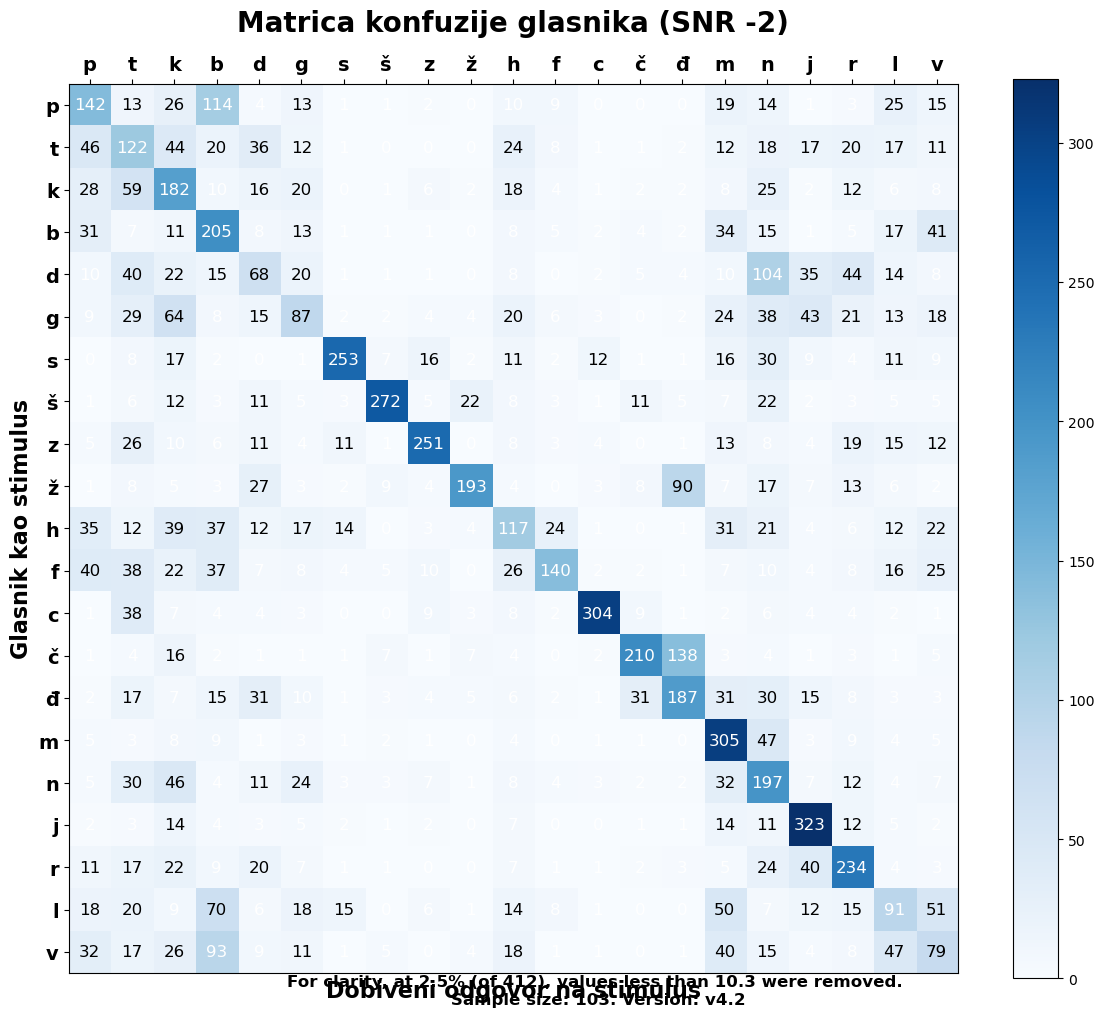

percent_threshold: 2.5% of 412 is 10.3 (the treshold)


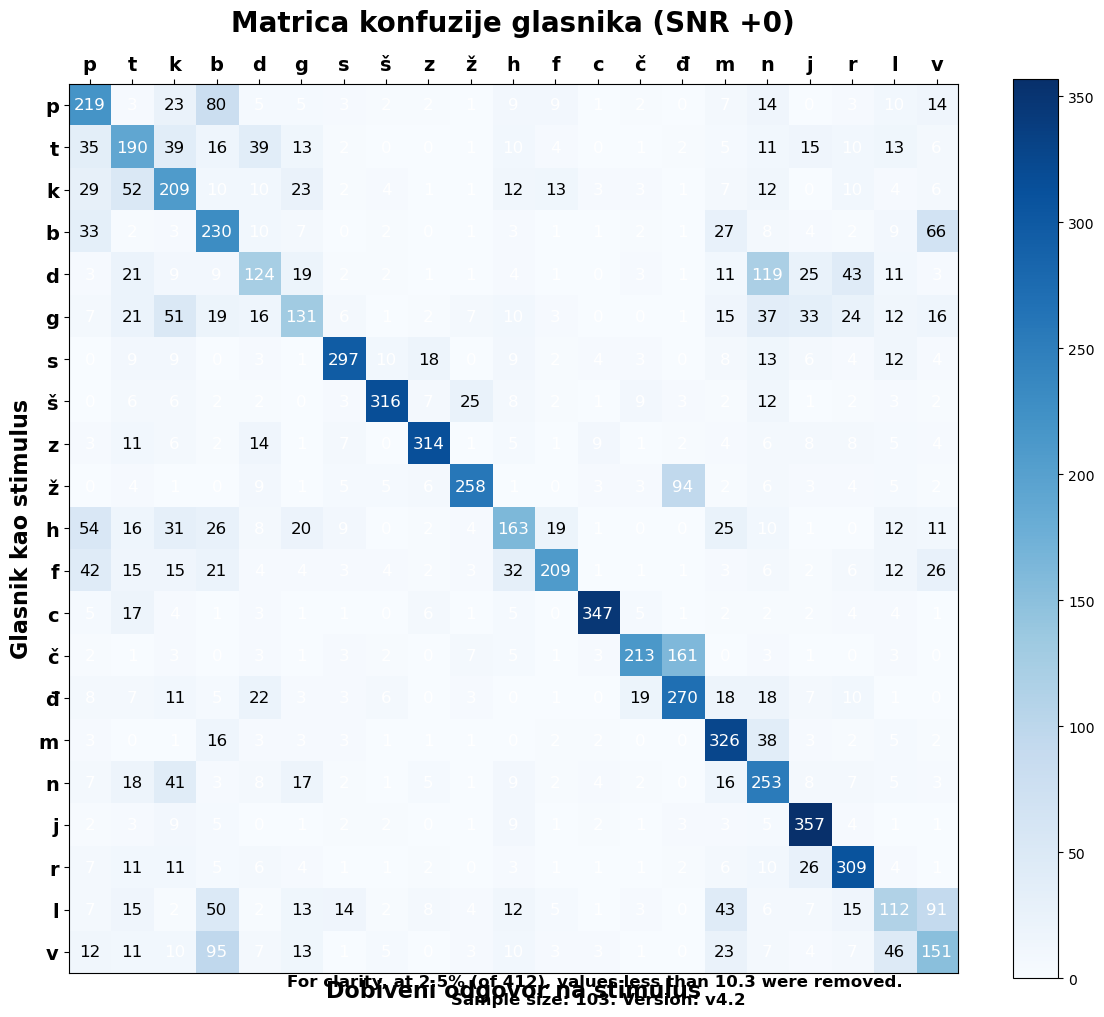

percent_threshold: 2.5% of 412 is 10.3 (the treshold)


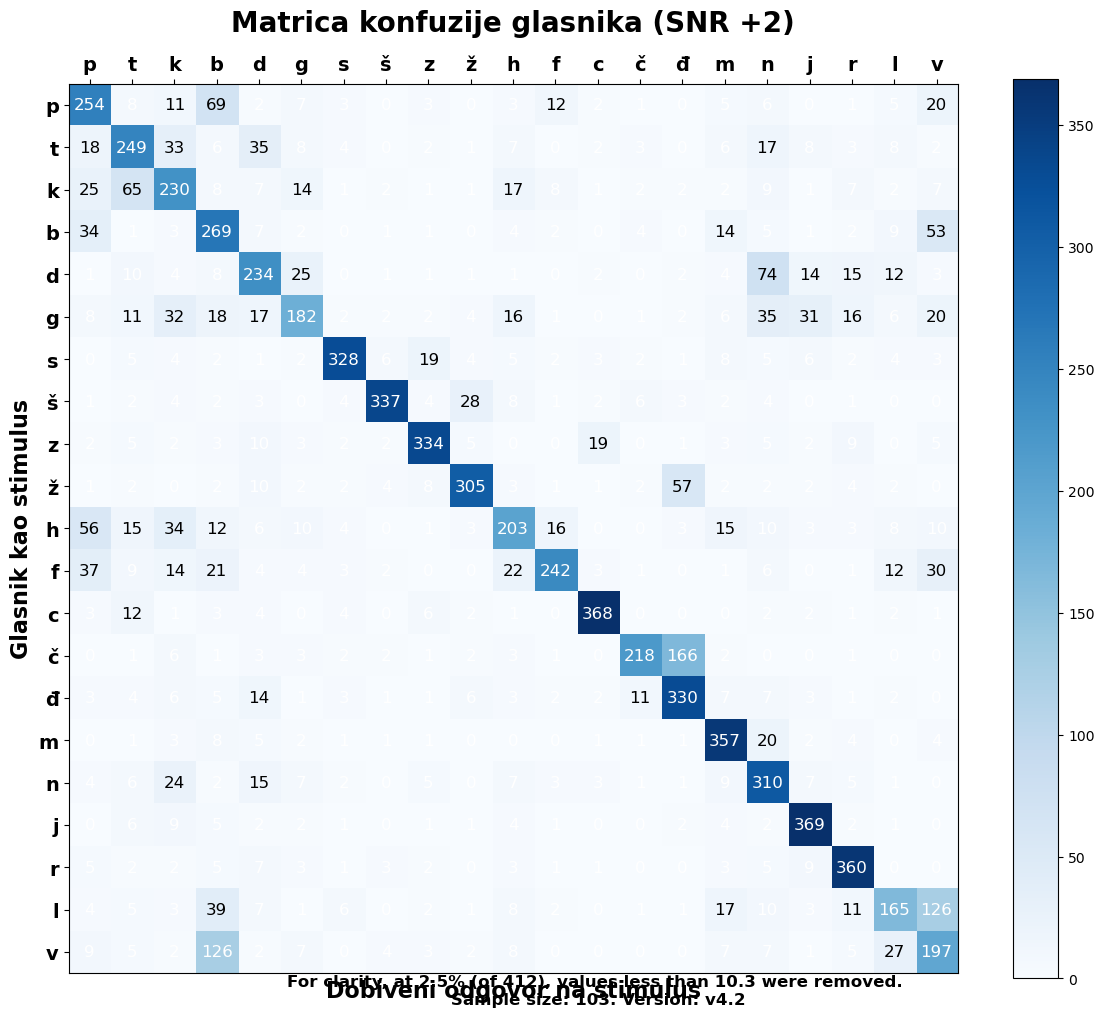

In [83]:
# import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import rgb_to_hsv

treshold = 0
print_kom = 1

subsection_counts3 = stats_dict['S3']['03']
sub_sum_dict = sum(subsection_counts3.values())
# print(sub_sum_dict)


# Define the phonemes
#phonemes = ['p', 't', 'k', 'b', 'd', 'g', 's', 'š', 'z', 'ž', 'h', 'f', 'c', 'č', 'đ', 'm', 'n', 'j', 'r', 'l', 'v']
phonemes = list(phoneme_mapping_sosci.values())

# Define the correct answers mapping for S1 (shared for S2 and S3)
correct_answers = {
    'S1': {
        '01': 'p', '02': 't', '03': 'k', '04': 'b', '05': 'd', '06': 'g', '07': 's', '08': 'š', '09': 'z', '10': 'ž',
        '11': 'f', '12': 'h', '13': 'c', '14': 'č', '15': 'đ', '16': 'j', '17': 'n', '18': 'm', '19': 'r', '20': 'l',
        '21': 'v'
    }
}

correct_answers_sosci = {
    'S1': {
        '01': 'p', '02': 't', '03': 'k', '04': 'b', '05': 'd', '06': 'g', '07': 's', '08': 'š', '09': 'z', '10': 'ž',
        '11': 'h', '12': 'f', '13': 'c', '14': 'č', '15': 'đ', '16': 'm', '17': 'n', '18': 'j', '19': 'r', '20': 'l',
        '21': 'v'
    }
}


if map_to_sosci == True:
    correct_answers1 = correct_answers_sosci
else:
    correct_answers1 = correct_answers


snr_prefix_mapping = {
    'SNR -2': 'S1',
    'SNR +0': 'S2',
    'SNR +2': 'S3'
}

# Reverse the mapping to make it easier to lookup
reverse_snr_prefix_mapping = {v: k for k, v in snr_prefix_mapping.items()}

# Function to create and fill a confusion matrix
def create_confusion_matrix(combined_dict, correct_answers1, session):
    confusion_matrix_data = pd.DataFrame(0, index=phonemes, columns=phonemes)
    for key, counts in combined_dict[session].items():
        true_phoneme = correct_answers1['S1'][key]  # Use S1's correct answers for all sessions
        for phoneme, count in counts.items():
            confusion_matrix_data.loc[true_phoneme, phoneme] += count
    return confusion_matrix_data

# Create confusion matrices for each session
confusion_matrix_S1 = create_confusion_matrix(combined_dict, correct_answers1, 'S1')
confusion_matrix_S2 = create_confusion_matrix(combined_dict, correct_answers1, 'S2')
confusion_matrix_S3 = create_confusion_matrix(combined_dict, correct_answers1, 'S3')

sessions = ['S1', 'S2', 'S3']

# Check the value of print_kom
if print_kom == 3:
    # Plot all three confusion matrices in one figure
    fig, axs = plt.subplots(3, 1, figsize=(13, 30))  # Adjust the figure size as needed
    
    confusion_matrices = [confusion_matrix_S1, confusion_matrix_S2, confusion_matrix_S3]

    for ax, session, confusion_matrix_data in zip(axs, sessions, confusion_matrices):
        cax = ax.matshow(confusion_matrix_data, cmap='Blues')

        # Calculate the total sum of the values in the DataFrame
        total_sum = confusion_matrix_data.iloc[0].sum()

        percent_treshold = 0.025
        
        # Calculate 5% of the total sum
        treshold = total_sum * percent_treshold
        
        # Add color bar
        plt.colorbar(cax, ax=ax)

        # Set labels
        ax.set_xticks(np.arange(len(phonemes)))
        ax.set_yticks(np.arange(len(phonemes)))
        ax.set_xticklabels(phonemes, fontweight='bold')
        ax.set_yticklabels(phonemes, fontweight='bold')

        # Add text annotations, leaving cells empty if value is 4 or less
        for i in range(len(phonemes)):
            for j in range(len(phonemes)):
                value = confusion_matrix_data.iloc[i, j]
                if value < treshold:
                    text_color = 'white'
                elif treshold <= value <= 90:
                    text_color = 'black'
                else:
                    text_color = 'white'
                ax.text(j, i, int(value), ha='center', va='center', fontweight='bold', color=text_color)

        snr_title = reverse_snr_prefix_mapping.get(session, 'Unknown SNR')
        ax.set_title(f'Matrica konfuzije glasnika ({snr_title})', fontsize=20, fontweight='bold')
        ax.set_xlabel('Dobiveni odgovor na stimulus', fontsize=16, fontweight='bold')
        ax.set_ylabel('Glasnik kao stimulus', fontsize=16, fontweight='bold')

    print(f"percent_threshold: {percent_treshold*100}% of {total_sum} is {treshold} (the treshold)")

    bottom_text = f"For clarity, at {percent_treshold*100}% (of {total_sum}), values less than {treshold} were removed.\n Sample size: {sub_sum_dict}"
    fig.text(0.5, 0.005, bottom_text, ha='center', fontsize=12, fontweight='bold')

    matrix_plot_version = f"\Matrica_konfuzije_glasnika_S1-S2-S3_{work_version}.png"
    matrix_path = data_path_base + matrix_plot_version
    # Save the plot as a PNG file
    plt.savefig(matrix_path)

    plt.tight_layout()
    plt.show()
else:
    # Plot each confusion matrix separately and save them individually
    confusion_matrices = [confusion_matrix_S1, confusion_matrix_S2, confusion_matrix_S3]
    
    for session, confusion_matrix_data in zip(sessions, confusion_matrices):
        fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the figure size as needed
        cax = ax.matshow(confusion_matrix_data, cmap='Blues')

        # Calculate the total sum of the values in the DataFrame
        total_sum = confusion_matrix_data.iloc[0].sum()
        
        percent_treshold = 0.025
        
        # Calculate 5% of the total sum
        treshold = total_sum * percent_treshold
        
        # Add color bar
        plt.colorbar(cax, ax=ax)
        # cbar = plt.colorbar(cax)
        # cbar.ax.tick_params(labelsize=14)
        
        # Set labels
        ax.set_xticks(np.arange(len(phonemes)))
        ax.set_yticks(np.arange(len(phonemes)))
        ax.set_xticklabels(phonemes, fontsize=14, fontweight='bold')
        ax.set_yticklabels(phonemes, fontsize=14, fontweight='bold')

        # Add text annotations, leaving cells empty if value is 4 or less
        for i in range(len(phonemes)):
            for j in range(len(phonemes)):
                value = confusion_matrix_data.iloc[i, j]
                if value < treshold:
                    text_color = 'white'
                elif treshold <= value <= 90:
                    text_color = 'black'
                else:
                    text_color = 'white'
                ax.text(j, i, int(value), ha='center', va='center', fontweight='medium', color=text_color, fontsize=12)

        snr_title = reverse_snr_prefix_mapping.get(session, 'Unknown SNR')
        ax.set_title(f'Matrica konfuzije glasnika ({snr_title})', fontsize=20, fontweight='bold', y=1.05)
        ax.set_xlabel('Dobiveni odgovor na stimulus', fontsize=16, fontweight='bold')
        ax.tick_params(axis='x', which='both', bottom=False)
        ax.set_ylabel('Glasnik kao stimulus', fontsize=16, fontweight='bold')

        print(f"percent_threshold: {percent_treshold*100}% of {total_sum} is {treshold:.1f} (the treshold)")

        bottom_text = f"For clarity, at {percent_treshold*100}% (of {total_sum}), values less than {treshold:.1f} were removed.\n Sample size: {sub_sum_dict}. Version: {work_version}"
        fig.text(0.5, 0.005, bottom_text, ha='center', fontsize=12, fontweight='bold')

        matrix_plot_version = f"\Matrica_konfuzije_glasnika_{session}_{work_version}.png"
        matrix_path = data_path_base + matrix_plot_version
        # Save the plot as a PNG file
        plt.savefig(matrix_path)

        plt.tight_layout()
        plt.show()


# END, PNGs iznad